# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">Group 30 - Project</h3>**

**Group members:**<br>Alexandra Pinto - 20211599@novaims.unl.pt - 20211599<br>
Gonçalo Peres - 20211625@novaims.unl.pt - 20211625<br>
Leonor Mira - 20240658@novaims.unl.pt - 20240658<br>
Miguel Natário - 20240498@novaims.unl.pt - 20240498<br>
Nuno Bernardino  - 2021546@novaims.unl.pt - 2021546<br>

## Table of Contents
* [Import the libraries](#chapter1)
* [Train dataset](#chapter2)
    * [Import the dataset](#section_2_1)
    * [Data explore](#section_2_2)
    * [Visualization](#section_2_3)  
* [Test dataset](#chapter3)
    * [Import the dataset](#section_3_1)
    * [Data explore](#section_2_2)
* [Feature Selection](#chapter4)


# Import the libraries<a class="anchor" id="chapter1"></a>

In [96]:
#importing standard data science libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

#  **<h3 align="center">Train dataset </h3>** <a class="anchor" id="chapter2"></a>
## Import the dataset <a class="anchor" id="section_2_1"></a>
Before importing the datasets, we need to unzip the data file.

In [97]:
zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


In [98]:
df_train = pd.read_csv('../project_data/Data/train_data.csv')

C:\Users\xandg\AppData\Local\Temp\ipykernel_10252\2994601923.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('../project_data/Data/train_data.csv')


In [99]:
df_train.head(4)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,...,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,...,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,...,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data explore <a class="anchor" id="section_2_2"></a>
The <span style='color:Blue'> info()  </span> method prints information about the dataframe.

In [100]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

In [101]:
#Converting Date Columns
# Convert object columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
df_train[date_columns] = df_train[date_columns].apply(pd.to_datetime, errors='coerce')

In [102]:
# Convert object columns to category
categorical_columns = ['Alternative Dispute Resolution', 'Carrier Name', 'Carrier Type', 
                       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
                       'District Name', 'Gender', 'WCB Decision', 'Medical Fee Region']

df_train[categorical_columns] = df_train[categorical_columns].astype('category')

In [103]:
# Example: Convert numerical columns stored as objects to float (if necessary)
df_train['Average Weekly Wage'] = pd.to_numeric(df_train['Average Weekly Wage'], errors='coerce')

#### Missing values

In [104]:
print(df_train.isnull().sum())

Accident Date                          23134
Age at Injury                          19445
Alternative Dispute Resolution         19445
Assembly Date                              0
Attorney/Representative                19445
Average Weekly Wage                    48096
Birth Year                             48523
C-2 Date                               34005
C-3 Date                              406226
Carrier Name                           19445
Carrier Type                           19445
Claim Identifier                           0
Claim Injury Type                      19445
County of Injury                       19445
COVID-19 Indicator                     19445
District Name                          19445
First Hearing Date                    442673
Gender                                 19445
IME-4 Count                           460668
Industry Code                          29403
Industry Code Description              29403
Medical Fee Region                     19445
OIICS Natu

In [105]:
# Set the threshold for missing values (e.g., more than 40% missing)
threshold = 0.4

# Calculate the percentage of missing values for each column
missing_percentage = df_train.isnull().mean()

# Filter columns that have more than the threshold of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold]

# Display the columns with their missing percentage
print(high_missing_columns)

C-3 Date                              0.684492
First Hearing Date                    0.745905
IME-4 Count                           0.776227
OIICS Nature of Injury Description    1.000000
dtype: float64


In [106]:
df_train = df_train.drop(['OIICS Nature of Injury Description','C-3 Date','First Hearing Date','IME-4 Count'], axis=1)

# WE still have missing values --> for now i will just delete them but we need to think about them

In [107]:
df_train.isnull().sum()

Accident Date                        23134
Age at Injury                        19445
Alternative Dispute Resolution       19445
Assembly Date                            0
Attorney/Representative              19445
Average Weekly Wage                  48096
Birth Year                           48523
C-2 Date                             34005
Carrier Name                         19445
Carrier Type                         19445
Claim Identifier                         0
Claim Injury Type                    19445
County of Injury                     19445
COVID-19 Indicator                   19445
District Name                        19445
Gender                               19445
Industry Code                        29403
Industry Code Description            29403
Medical Fee Region                   19445
WCIO Cause of Injury Code            35085
WCIO Cause of Injury Description     35085
WCIO Nature of Injury Code           35102
WCIO Nature of Injury Description    35102
WCIO Part O

In [108]:
df_train = df_train.dropna()

The <span style='color:Blue'> describe()  </span> method  is used for calculating some statistical data.

In [109]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,473997.0,4.246702e+01,13.764263,0.0,31.0,42.0,54.00,117.0
Average Weekly Wage,473997.0,5.076798e+02,6514.530694,0.0,0.0,0.0,871.41,2828079.0
Birth Year,473997.0,1.893329e+03,400.399479,0.0,1965.0,1977.0,1989.00,2018.0
Claim Identifier,473997.0,5.779718e+06,222288.100871,5393091.0,5587904.0,5779273.0,5972072.00,6165684.0
Industry Code,473997.0,5.880562e+01,19.621684,11.0,45.0,61.0,71.00,92.0
WCIO Cause of Injury Code,473997.0,5.427402e+01,25.824669,1.0,31.0,56.0,75.00,99.0
WCIO Nature of Injury Code,473997.0,4.095300e+01,22.188292,1.0,16.0,49.0,52.00,91.0
WCIO Part Of Body Code,473997.0,3.975983e+01,22.330312,-9.0,33.0,38.0,53.00,99.0
Agreement Reached,473997.0,4.732941e-02,0.212343,0.0,0.0,0.0,0.00,1.0
Number of Dependents,473997.0,3.007093e+00,2.001330,0.0,1.0,3.0,5.00,6.0


The <span style='color:Blue'> var()  </span> method allows us to check if there are any of the numerical variables are univariate (variance is equal to 0). <br>

In [110]:
df_train.var()

C:\Users\xandg\AppData\Local\Temp\ipykernel_10252\3907004805.py:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_train.var()


Age at Injury                 1.894549e+02
Average Weekly Wage           4.243911e+07
Birth Year                    1.603197e+05
Claim Identifier              4.941200e+10
Industry Code                 3.850105e+02
WCIO Cause of Injury Code     6.669135e+02
WCIO Nature of Injury Code    4.923203e+02
WCIO Part Of Body Code        4.986428e+02
Agreement Reached             4.508944e-02
Number of Dependents          4.005321e+00
dtype: float64

## Visualization <a class="anchor" id="section_2_3"></a>


#  **<h3 align="center">Test dataset </h3>** <a class="anchor" id="chapter3"></a>
## Import the dataset <a class="anchor" id="section_3_1"></a>

In [111]:
df_test = pd.read_csv('../project_data/Data/test_data.csv')
df_test.head(3)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,...,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Number of Dependents
0,2022-12-24,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,INDEMNITY INSURANCE CO OF,...,IV,NaN,31.0,"FALL, SLIP OR TRIP, NOC",10.0,CONTUSION,54.0,LOWER LEG,10466,1
1,2022-11-20,19,N,2023-01-02,N,NaN,2003.0,2023-01-02,NaN,A I U INSURANCE COMPANY,...,IV,NaN,75.0,FALLING OR FLYING OBJECT,10.0,CONTUSION,10.0,MULTIPLE HEAD INJURY,11691,1
2,2022-12-26,59,N,2023-01-02,N,0.0,1963.0,2022-12-31,NaN,AMGUARD INSURANCE COMPANY,...,III,NaN,68.0,STATIONARY OBJECT,49.0,SPRAIN OR TEAR,62.0,BUTTOCKS,10604,0


# Feature Selection <a class="anchor" id="chapter4"></a>
To start with the feature selection we first need to split our train dataset into X and y. And then split into train and validation.

In [112]:
X= df_train.drop('Claim Injury Type',axis=1)
y=df_train['Claim Injury Type']

In [113]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler

In [114]:
X_train, X_val, y_train, y_val = train_test_split(X,y, 
                                                  test_size = 0.2, 
                                                  random_state = 42,
                                                  stratify = y, 
                                                  shuffle = True)

 ## <b>1. Selecting Numeric Features</b> <a class="anchor" id="section_4_1"></a>
  > ### Scale the data <a class="anchor" id="sub_section_4_1_1"></a>

In [115]:
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

In [116]:
#scaling features
feat_scaler = RobustScaler()
X_train[numerical_columns] = feat_scaler.fit_transform(X_train[numerical_columns])

#apply same transformation for test data
X_val[numerical_columns] = feat_scaler.transform(X_val[numerical_columns])

 > ### Spearman and Pearson correlation matrix <a class="anchor" id="sub_section_4_1_2"></a>

In [117]:
def cor_heatmap(cor, name):
    plt.figure(figsize=(18,12))
    sns.heatmap(data = cor.round(2), annot = True, cmap = 'viridis', linecolor = 'white', linewidth=0.5, fmt='.2', mask=np.triu(cor, k=0))
    plt.title(f'{name} Correlation Matrix', fontdict = {'fontsize': 20})
    plt.show()

In [118]:
#we have to create features_continuous 

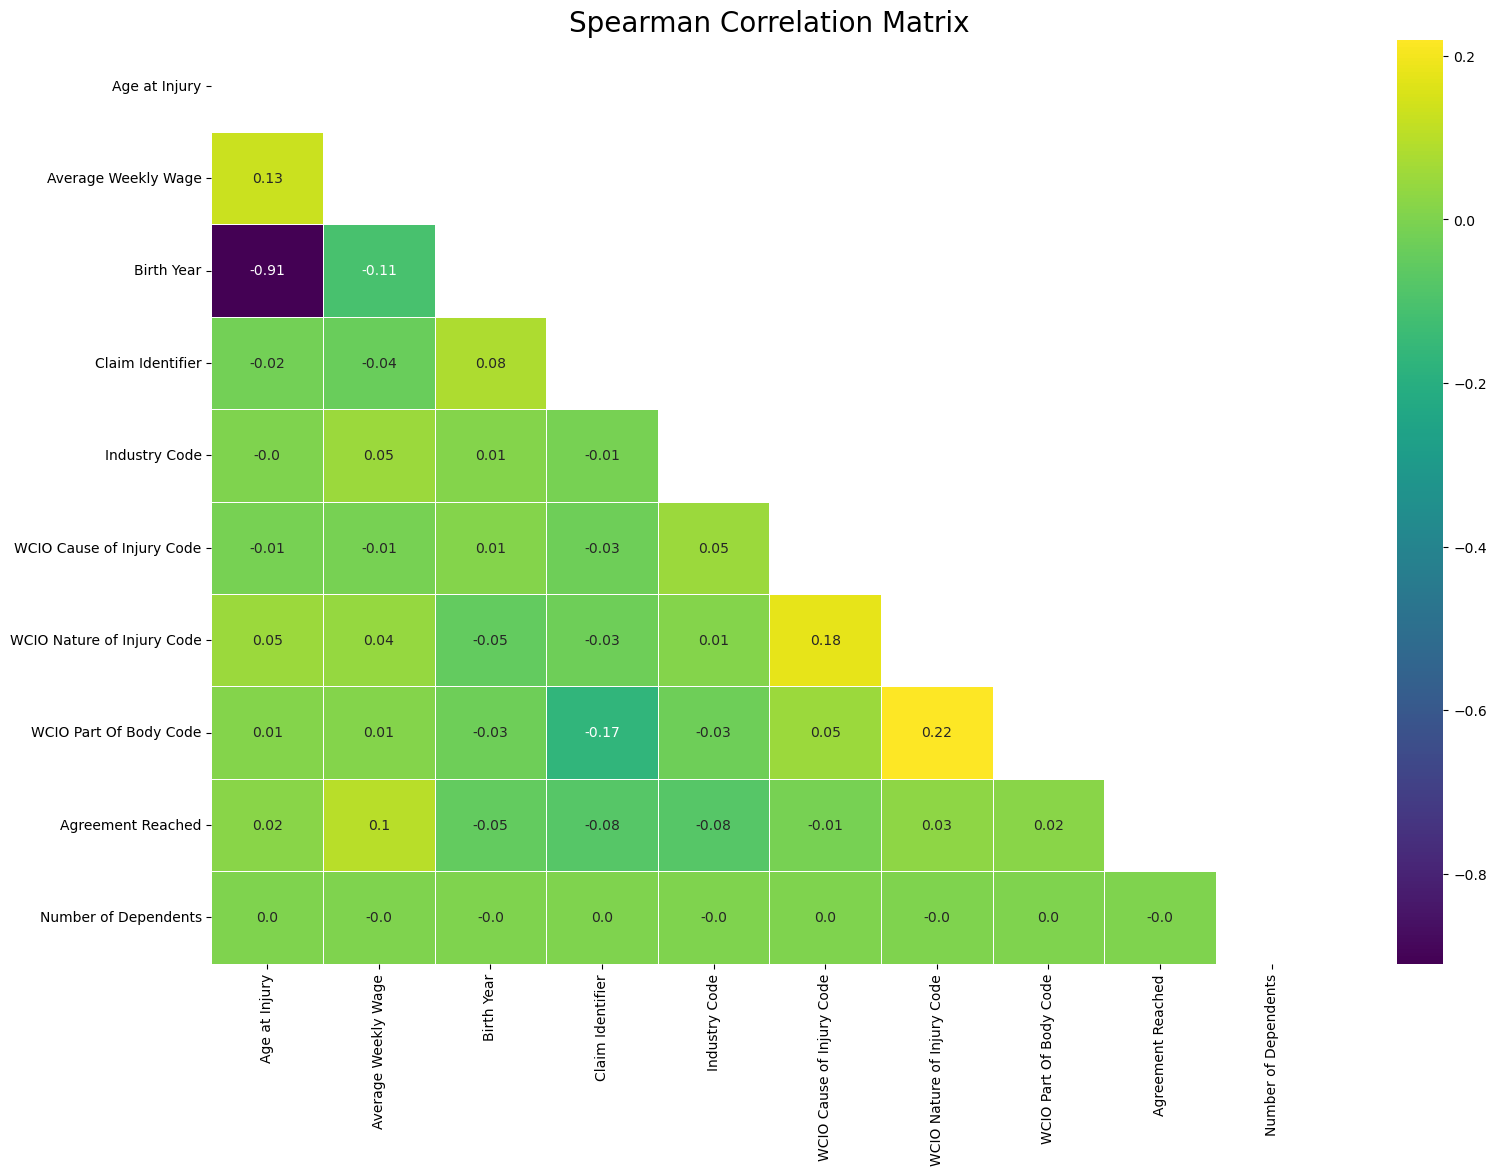

In [120]:
corr_data_numerical = df_train[numerical_columns]
# corr_data_continuous = df_train[features_continuous]
cor_spearman = corr_data_numerical.corr(method='spearman')
# cor_pearson = corr_data_continuous.corr(method='pearson')

cor_heatmap(cor_spearman, 'Spearman')
# cor_heatmap(cor_pearson, 'Pearson')

 > ### LASSO Regression <a class="anchor" id="sub_section_4_1_3"></a>

In [ ]:
#fit regression
reg = LassoCV().fit(X_train[features_continuous], y_train)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train[features_continuous].columns)
#obtain coef values
coef.sort_values()

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(3,5))
    imp_coef.plot(kind = "barh", color='c')
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
plot_importance(coef,'Lasso')

 > ### Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_1_4"></a>

In [ ]:
# Number of features
nof_list=np.arange(1,27)            
high_score=0
# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train[features_numerical],y_train)
    X_val_rfe = rfe.transform(X_val[features_numerical])
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))